In [2]:
!pip install tabulate
!pip install iexfinance
!pip install datetime

   ---------------------------------------- 0.0/54.3 kB ? eta -:--:--
   ---------------------------------------- 54.3/54.3 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   ---------------------------------------- 52.6/52.6 kB 1.4 MB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 
from tabulate import tabulate

from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\risha\Downloads\FRA_Rishabh\Market_Risk_Data_coded.csv')

In [3]:
df.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [5]:
df.shape

(418, 6)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ITC Limited,418.0,278.964115,75.114405,156.0,224.25,265.5,304.00,493.0
Bharti Airtel,418.0,528.260766,226.507879,261.0,334.00,478.0,706.75,1236.0
Tata Motors,418.0,368.617225,182.024419,65.0,186.00,399.5,466.00,1035.0
DLF Limited,418.0,276.827751,156.280781,110.0,166.25,213.0,360.50,928.0
Yes Bank,418.0,124.442584,130.090884,11.0,16.00,30.0,249.75,397.0


In [7]:
print('Number of Duplicates =', df.duplicated().sum().sum())

Number of Duplicates = 0


In [8]:
null_counts = df.isnull().sum()
print(null_counts)

Date             0
ITC Limited      0
Bharti Airtel    0
Tata Motors      0
DLF Limited      0
Yes Bank         0
dtype: int64


In [9]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 418 entries, 2016-03-28 to 2024-03-25
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ITC Limited    418 non-null    int64
 1   Bharti Airtel  418 non-null    int64
 2   Tata Motors    418 non-null    int64
 3   DLF Limited    418 non-null    int64
 4   Yes Bank       418 non-null    int64
dtypes: int64(5)
memory usage: 19.6 KB


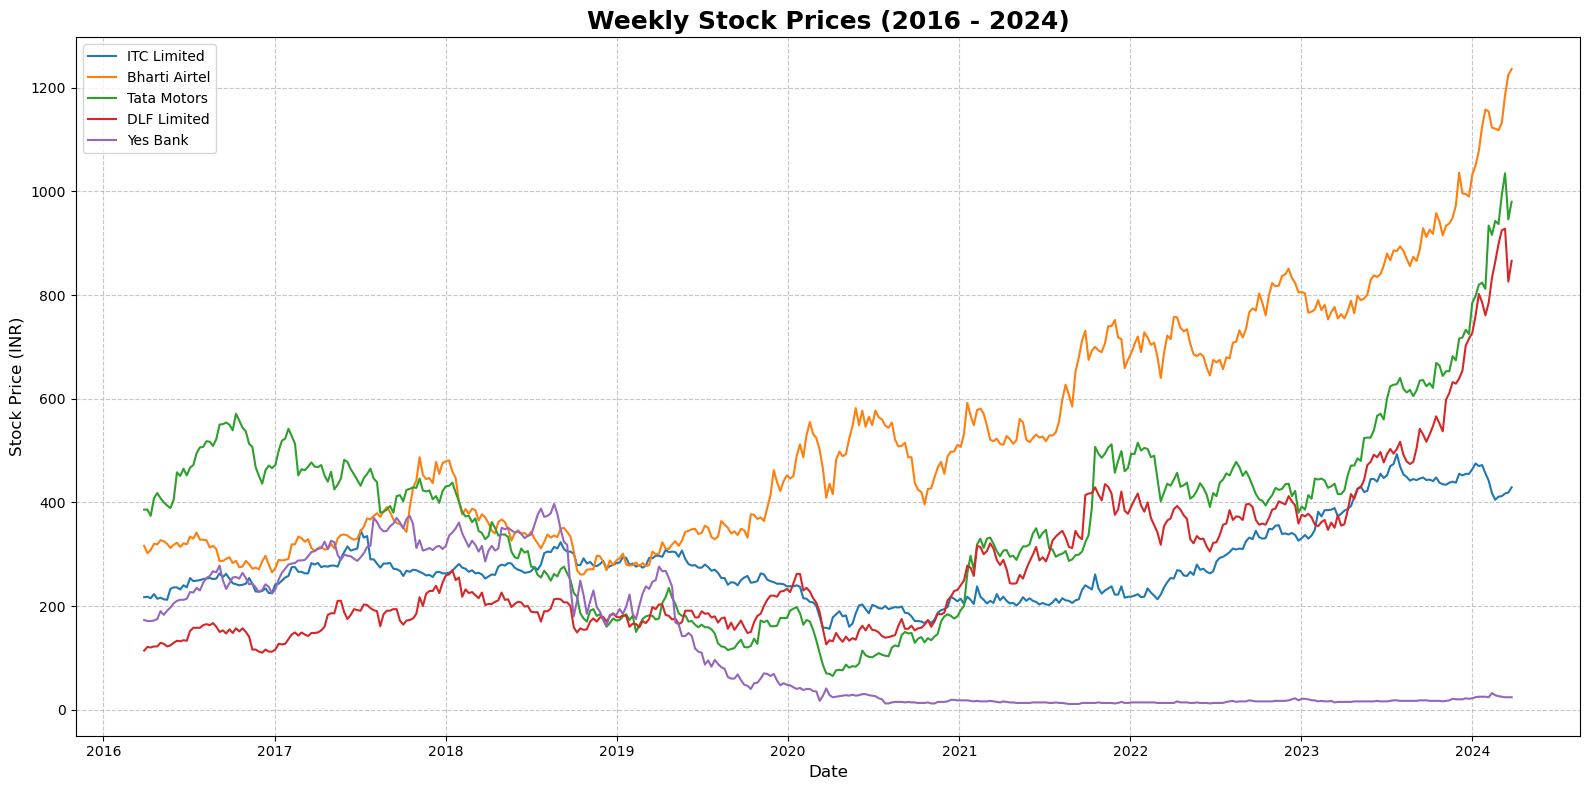

In [11]:

plt.figure(figsize=(16, 8))
for stock in df.columns:
    plt.plot(df.index, df[stock], label=stock, linewidth=1.5)

plt.title('Weekly Stock Prices (2016 - 2024)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (INR)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



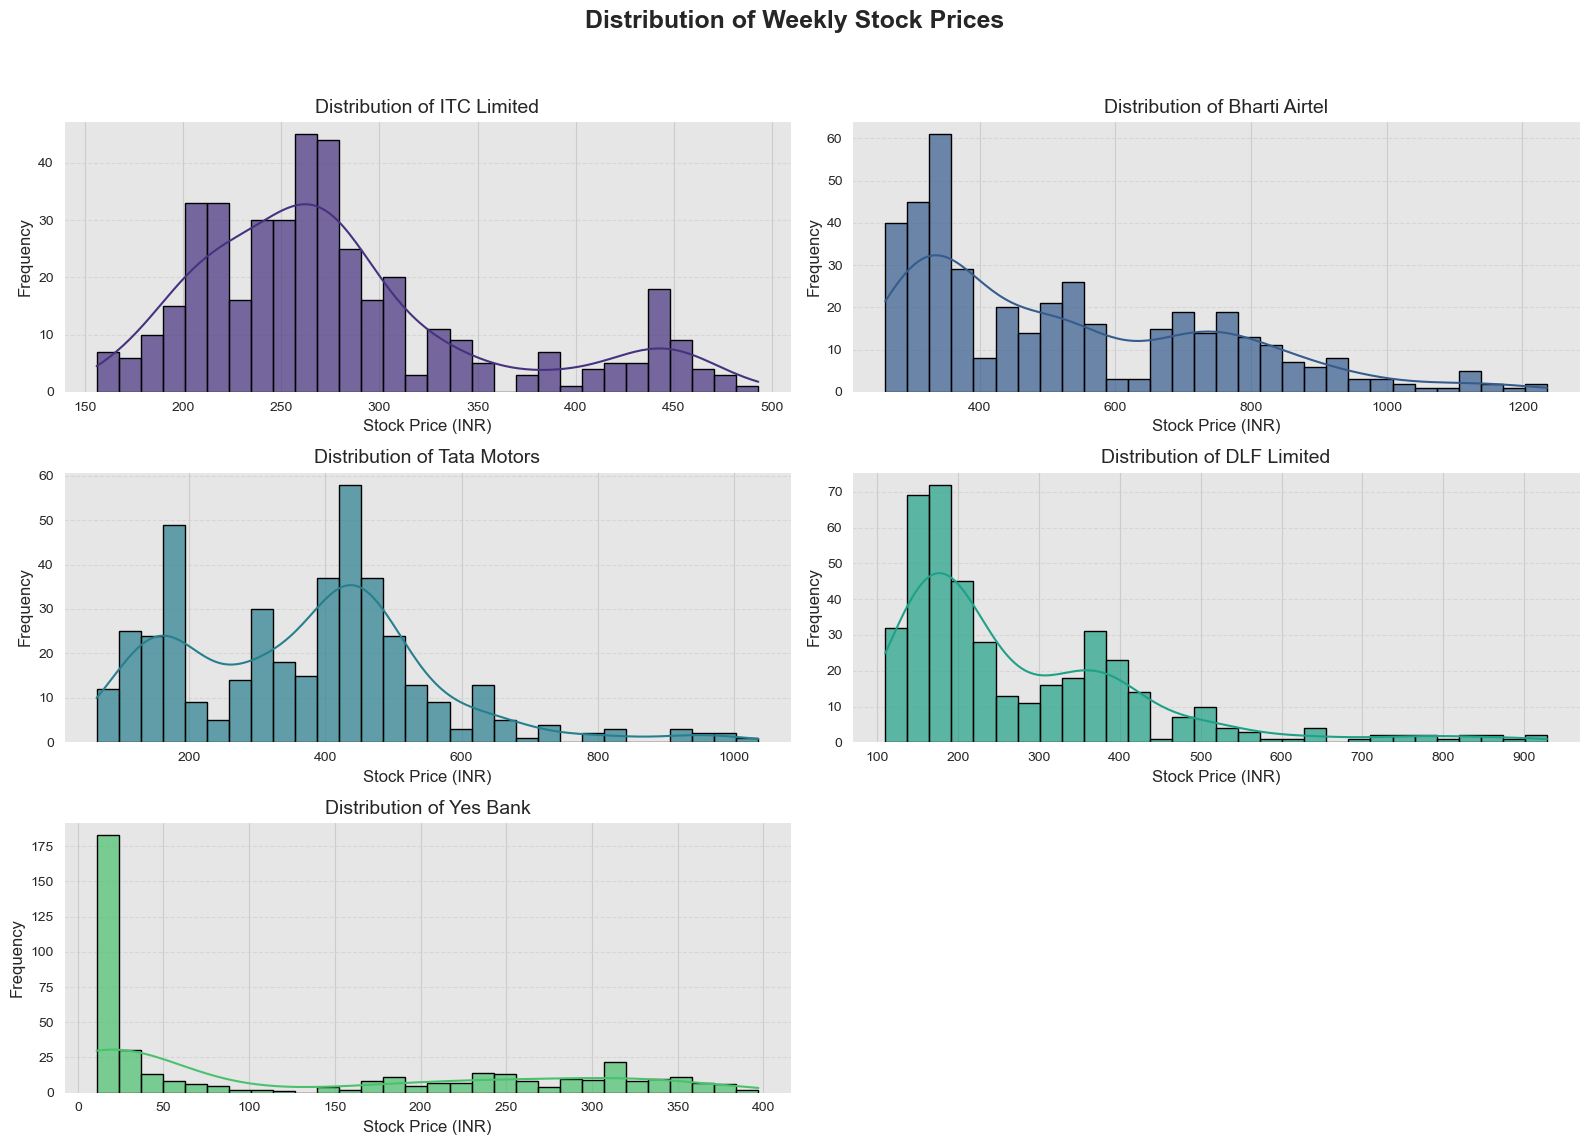

In [12]:


# Set a visually appealing seaborn style with more color
sns.set_style('darkgrid', {"axes.facecolor": ".9", "grid.color": ".8"})
colors = sns.color_palette('viridis') # Using a vibrant color palette

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.suptitle("Distribution of Weekly Stock Prices", fontsize=18, fontweight='bold')

for i, stock in enumerate(df.columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df[stock], bins=30, kde=True, ax=ax, color=colors[i], edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {stock}', fontsize=14)
    ax.set_xlabel('Stock Price (INR)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Remove any unused subplots if the number of stocks is not 6
if len(df.columns) < 6:
    for i in range(len(df.columns), 6):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()



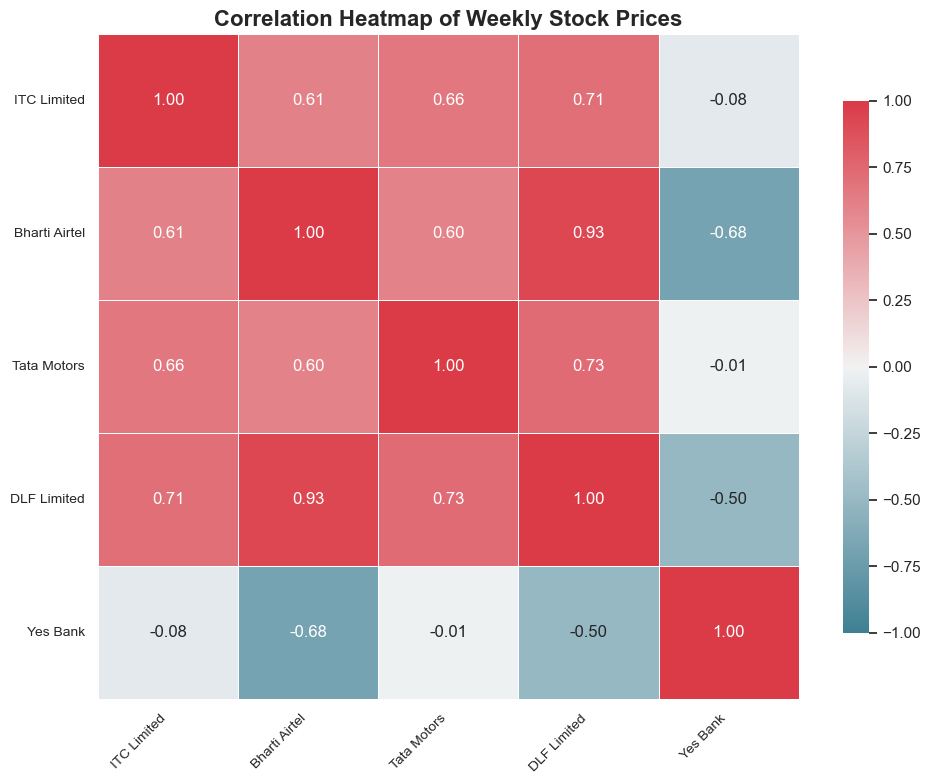

In [20]:

plt.figure(figsize=(10, 8))  # Slightly larger figure size for better readability
correlation_matrix = df.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True) # Example of a diverging palette

sns.heatmap(correlation_matrix,
            annot=True,       # Display correlation values on the heatmap
            cmap=cmap,         # Use the chosen colormap
            fmt=".2f",        # Format correlation values to two decimal places
            linewidths=.5,    # Add lines between cells for better separation
            linecolor='white', # Set the color of the lines
            vmin=-1, vmax=1,    # Explicitly set the color scale range
            cbar_kws={'shrink': .8}) # Adjust the size of the color bar

plt.title("Correlation Heatmap of Weekly Stock Prices", fontsize=16, fontweight='bold')
plt.xticks(fontsize=10, rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(fontsize=10, rotation=0)          # Ensure y-axis labels are horizontal
plt.tight_layout()                           # Adjust layout to prevent labels from being cut off
plt.show()



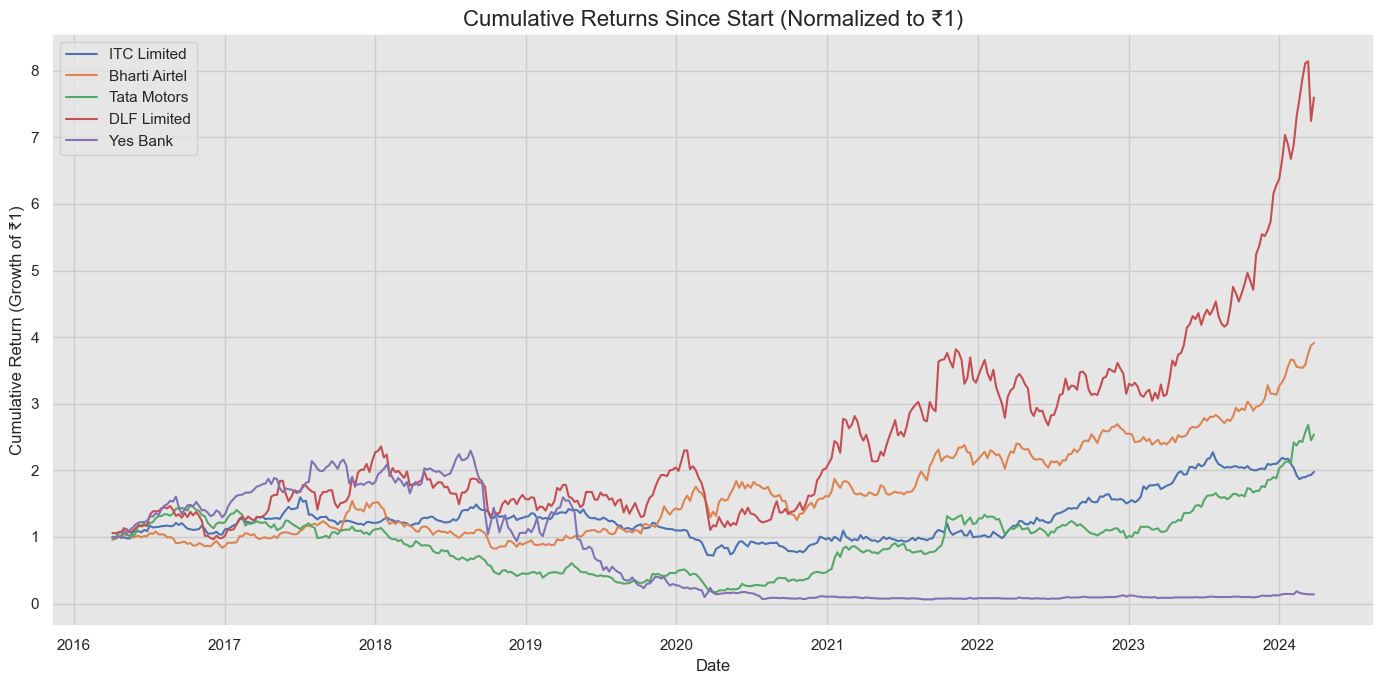

In [24]:
# Calculate weekly returns
returns = df.pct_change().dropna()

# Compute cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
for stock in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)

plt.title("Cumulative Returns Since Start (Normalized to ₹1)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Growth of ₹1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


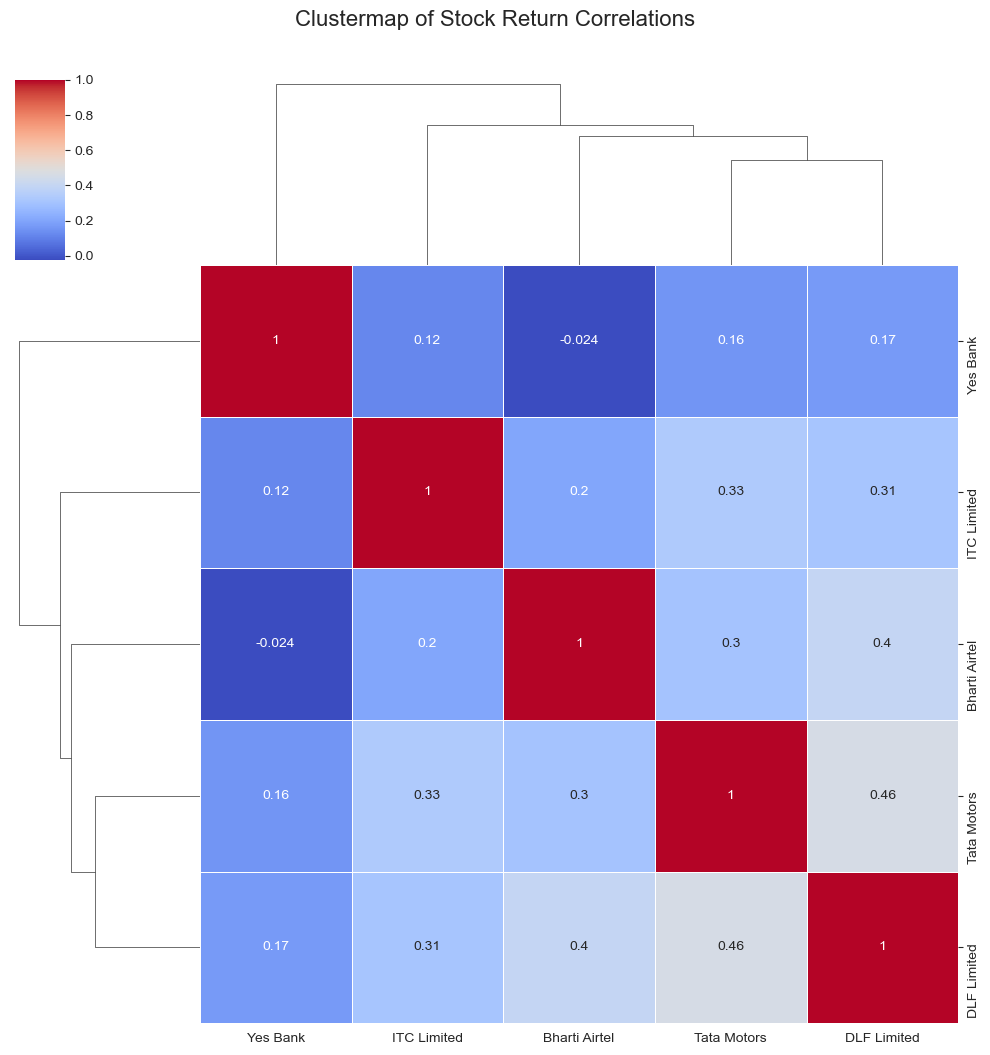

In [13]:
# Use correlation of returns for clustering
returns = df.pct_change().dropna()
corr_matrix = returns.corr()

# Cluster map
sns.clustermap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.suptitle("Clustermap of Stock Return Correlations", y=1.05, fontsize=16)
plt.show()


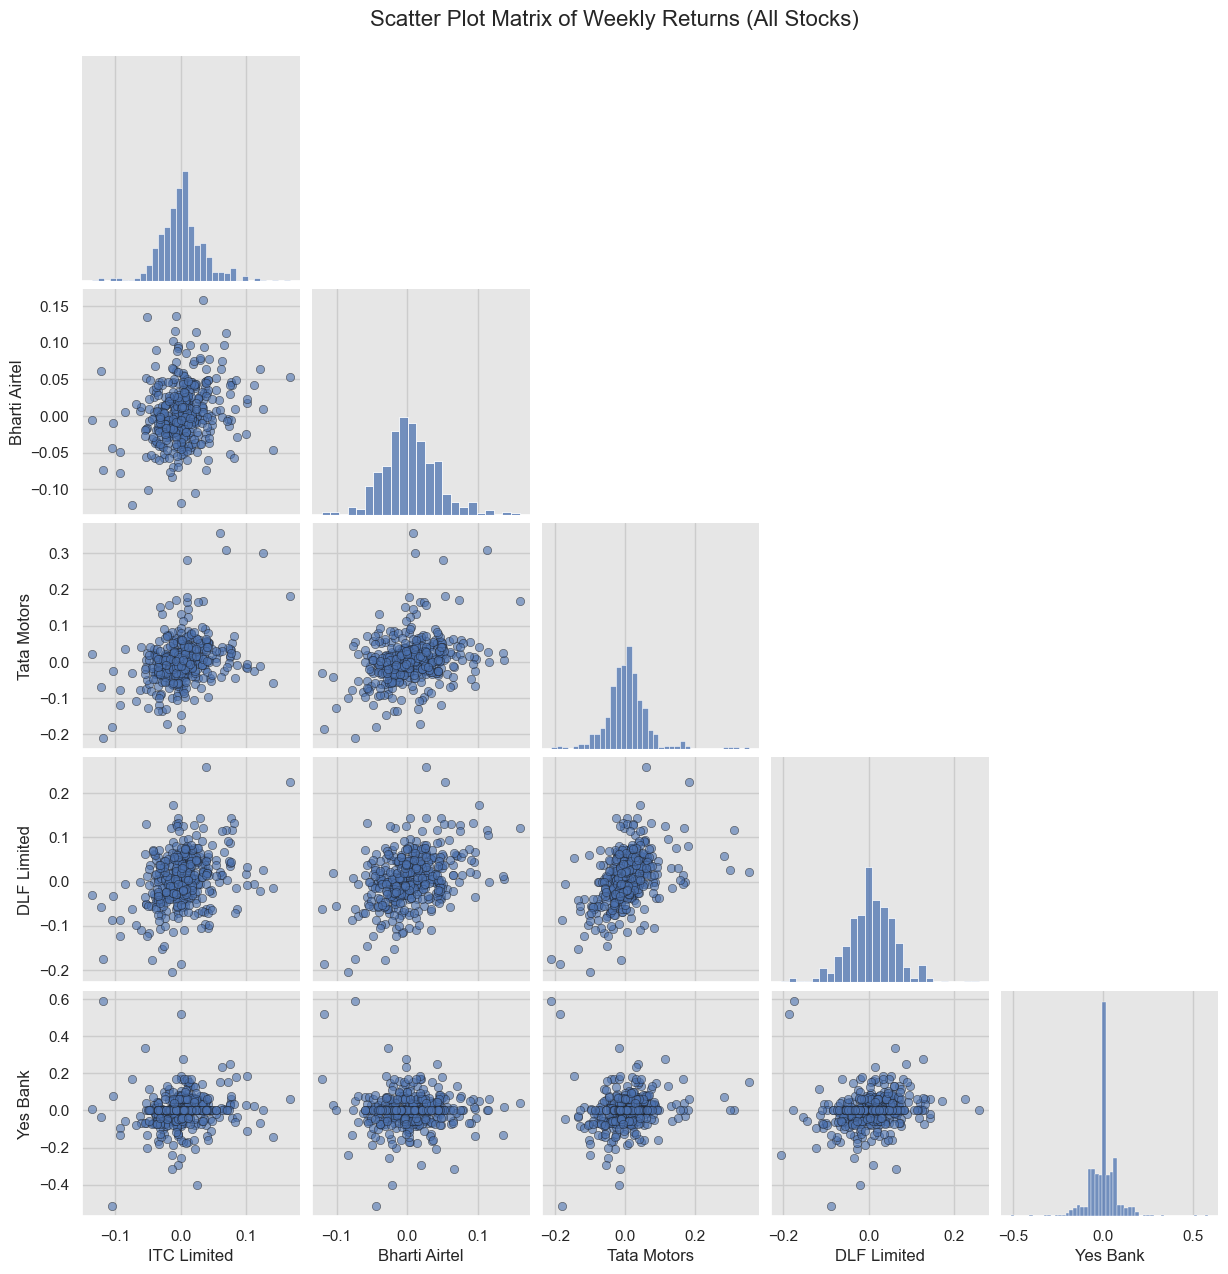

In [27]:
# Calculate weekly returns
returns = df.pct_change().dropna()

# Pairwise scatter plot of returns
sns.pairplot(returns, kind='scatter', corner=True, plot_kws={'alpha': 0.6, 'edgecolor': 'k'})
plt.suptitle("Scatter Plot Matrix of Weekly Returns (All Stocks)", y=1.02, fontsize=16)
plt.show()


**Generating technical indicators of the stock###**

In [14]:
# 1. Compute Weekly Returns
returns = df.pct_change().dropna()  # percentage change week over week


In [15]:
# 2. Mean and Standard Deviation (Weekly)
mean_returns = returns.mean()
std_returns = returns.std()

In [16]:
# 3. Annualize Returns and Volatility
annualized_return = mean_returns * 52
annualized_volatility = std_returns * np.sqrt(52)

In [21]:
# Combine into DataFrame
risk_metrics = pd.DataFrame({
    'Mean Weekly Return': mean_returns,
    'Weekly Volatility': std_returns,
    'Annualized Return': annualized_return,
    'Annualized Volatility': annualized_volatility
}).sort_values(by='Annualized Volatility', ascending=False)

print("📊 Risk Metrics Summary:")
print(risk_metrics)

📊 Risk Metrics Summary:
               Mean Weekly Return  Weekly Volatility  Annualized Return  \
Yes Bank                -0.000475           0.091095          -0.024715   
Tata Motors              0.004088           0.061976           0.212571   
DLF Limited              0.006540           0.057796           0.340099   
Bharti Airtel            0.004029           0.039073           0.209511   
ITC Limited              0.002281           0.036127           0.118629   

               Annualized Volatility  
Yes Bank                    0.656895  
Tata Motors                 0.446915  
DLF Limited                 0.416772  
Bharti Airtel               0.281760  
ITC Limited                 0.260514  


📊 Mean and Standard Deviation of Weekly Returns:

               Mean Weekly Return  Standard Deviation
Yes Bank                -0.000475            0.091095
Tata Motors              0.004088            0.061976
DLF Limited              0.006540            0.057796
Bharti Airtel            0.004029            0.039073
ITC Limited              0.002281            0.036127


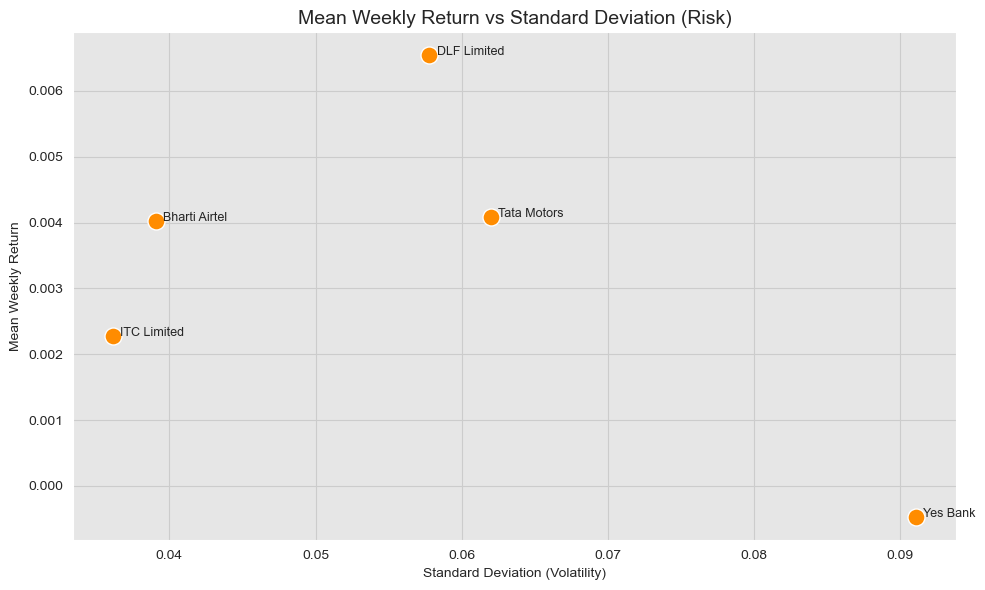

In [22]:


# Calculate mean and standard deviation
mean_returns = returns.mean()
std_returns = returns.std()

# Create summary DataFrame
risk_return_df = pd.DataFrame({
    'Mean Weekly Return': mean_returns,
    'Standard Deviation': std_returns
}).sort_values(by='Standard Deviation', ascending=False)

# Print the values
print("📊 Mean and Standard Deviation of Weekly Returns:\n")
print(risk_return_df)

# Plot Mean vs Standard Deviation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Standard Deviation',
    y='Mean Weekly Return',
    data=risk_return_df,
    s=150,
    color='darkorange'
)

# Annotate each point with stock name
for stock in risk_return_df.index:
    plt.text(
        x=risk_return_df.loc[stock, 'Standard Deviation'] + 0.0005,
        y=risk_return_df.loc[stock, 'Mean Weekly Return'],
        s=stock,
        fontsize=9
    )

plt.title('Mean Weekly Return vs Standard Deviation (Risk)', fontsize=14)
plt.xlabel('Standard Deviation (Volatility)')
plt.ylabel('Mean Weekly Return')
plt.grid(True)
plt.tight_layout()
plt.show()


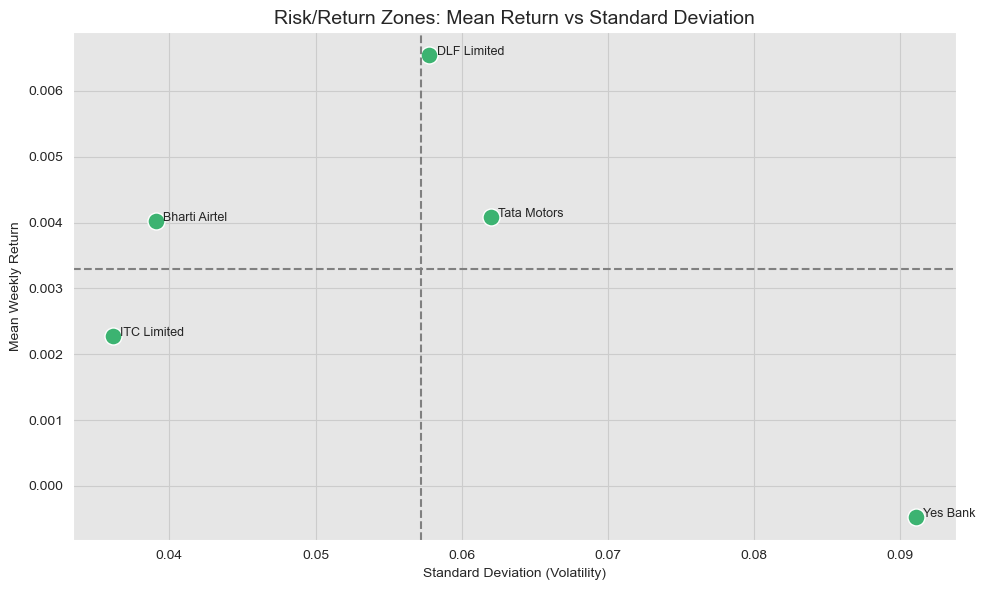

In [23]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Standard Deviation',
    y='Mean Weekly Return',
    data=risk_return_df,
    s=150,
    color='mediumseagreen'
)

# Draw quadrant lines
plt.axhline(risk_return_df['Mean Weekly Return'].mean(), color='gray', linestyle='--')
plt.axvline(risk_return_df['Standard Deviation'].mean(), color='gray', linestyle='--')

# Annotate
for stock in risk_return_df.index:
    plt.text(
        x=risk_return_df.loc[stock, 'Standard Deviation'] + 0.0005,
        y=risk_return_df.loc[stock, 'Mean Weekly Return'],
        s=stock,
        fontsize=9
    )

plt.title('Risk/Return Zones: Mean Return vs Standard Deviation', fontsize=14)
plt.xlabel('Standard Deviation (Volatility)')
plt.ylabel('Mean Weekly Return')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# Risk-free rate (weekly)
risk_free_rate = 0.005

# Sharpe Ratio calculation
sharpe_ratios = (mean_returns - risk_free_rate) / std_returns

# Create DataFrame
sharpe_df = pd.DataFrame({
    'Mean Return': mean_returns,
    'Standard Deviation': std_returns,
    'Sharpe Ratio': sharpe_ratios
}).sort_values(by='Sharpe Ratio', ascending=False)

print("📈 Sharpe Ratios:\n")
print(sharpe_df)


📈 Sharpe Ratios:

               Mean Return  Standard Deviation  Sharpe Ratio
DLF Limited       0.006540            0.057796      0.026652
Tata Motors       0.004088            0.061976     -0.014717
Bharti Airtel     0.004029            0.039073     -0.024849
Yes Bank         -0.000475            0.091095     -0.060105
ITC Limited       0.002281            0.036127     -0.075254


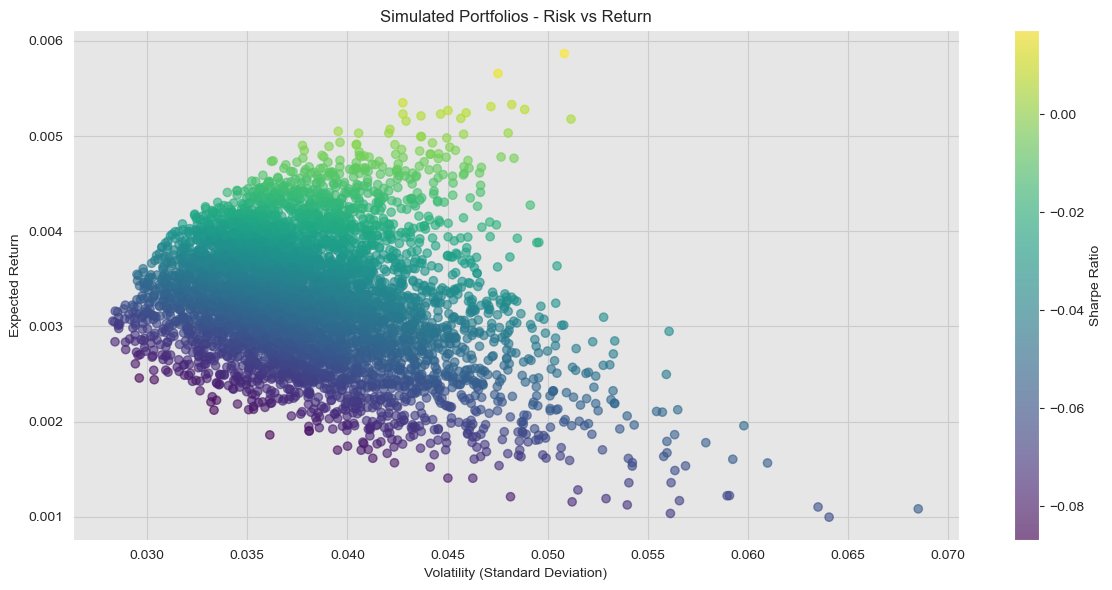


💡 Optimal Portfolio Weights (Max Sharpe):
ITC Limited: 0.86%
Bharti Airtel: 10.46%
Tata Motors: 1.36%
DLF Limited: 82.47%
Yes Bank: 4.84%


In [25]:
import random

num_portfolios = 5000
results = {'Returns': [], 'Volatility': [], 'Sharpe Ratio': [], 'Weights': []}
stocks = returns.columns

for _ in range(num_portfolios):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    port_return = np.sum(mean_returns * weights)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    sharpe = (port_return - risk_free_rate) / port_volatility

    results['Returns'].append(port_return)
    results['Volatility'].append(port_volatility)
    results['Sharpe Ratio'].append(sharpe)
    results['Weights'].append(weights)

# Convert to DataFrame
portfolios = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=portfolios['Sharpe Ratio'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Simulated Portfolios - Risk vs Return')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optimal portfolio
max_sharpe_idx = portfolios['Sharpe Ratio'].idxmax()
optimal_weights = portfolios.loc[max_sharpe_idx, 'Weights']
print("\n💡 Optimal Portfolio Weights (Max Sharpe):")
for stock, weight in zip(stocks, optimal_weights):
    print(f"{stock}: {weight:.2%}")


In [26]:
confidence_level = 0.95
initial_investment = 100000  # For example

# Portfolio returns (using optimal weights from above)
portfolio_returns = returns.dot(optimal_weights)

# Historical VaR
VaR_95 = np.percentile(portfolio_returns, (1 - confidence_level) * 100)
value_at_risk = -VaR_95 * initial_investment

print(f"\n🔻 Value at Risk (1-week, 95% confidence): ₹{value_at_risk:,.2f}")



🔻 Value at Risk (1-week, 95% confidence): ₹8,108.35


In [27]:
# RSI Calculation Function
def compute_rsi(prices, window=14):
    delta = prices.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Step 2: Compute RSI for All Stocks
rsi_df = pd.DataFrame(index=df.index)

for stock in df.columns:
    rsi_df[stock] = compute_rsi(df[stock])

# Step 3: Print Last RSI Value for Each Stock
print("📊 Latest RSI Values (last available date):\n")
print(rsi_df.tail(1).T.rename(columns={rsi_df.tail(1).index[0]: 'RSI'}))


📊 Latest RSI Values (last available date):

Date                 RSI
ITC Limited    38.983051
Bharti Airtel  86.404834
Tata Motors    74.074074
DLF Limited    68.222222
Yes Bank       54.545455


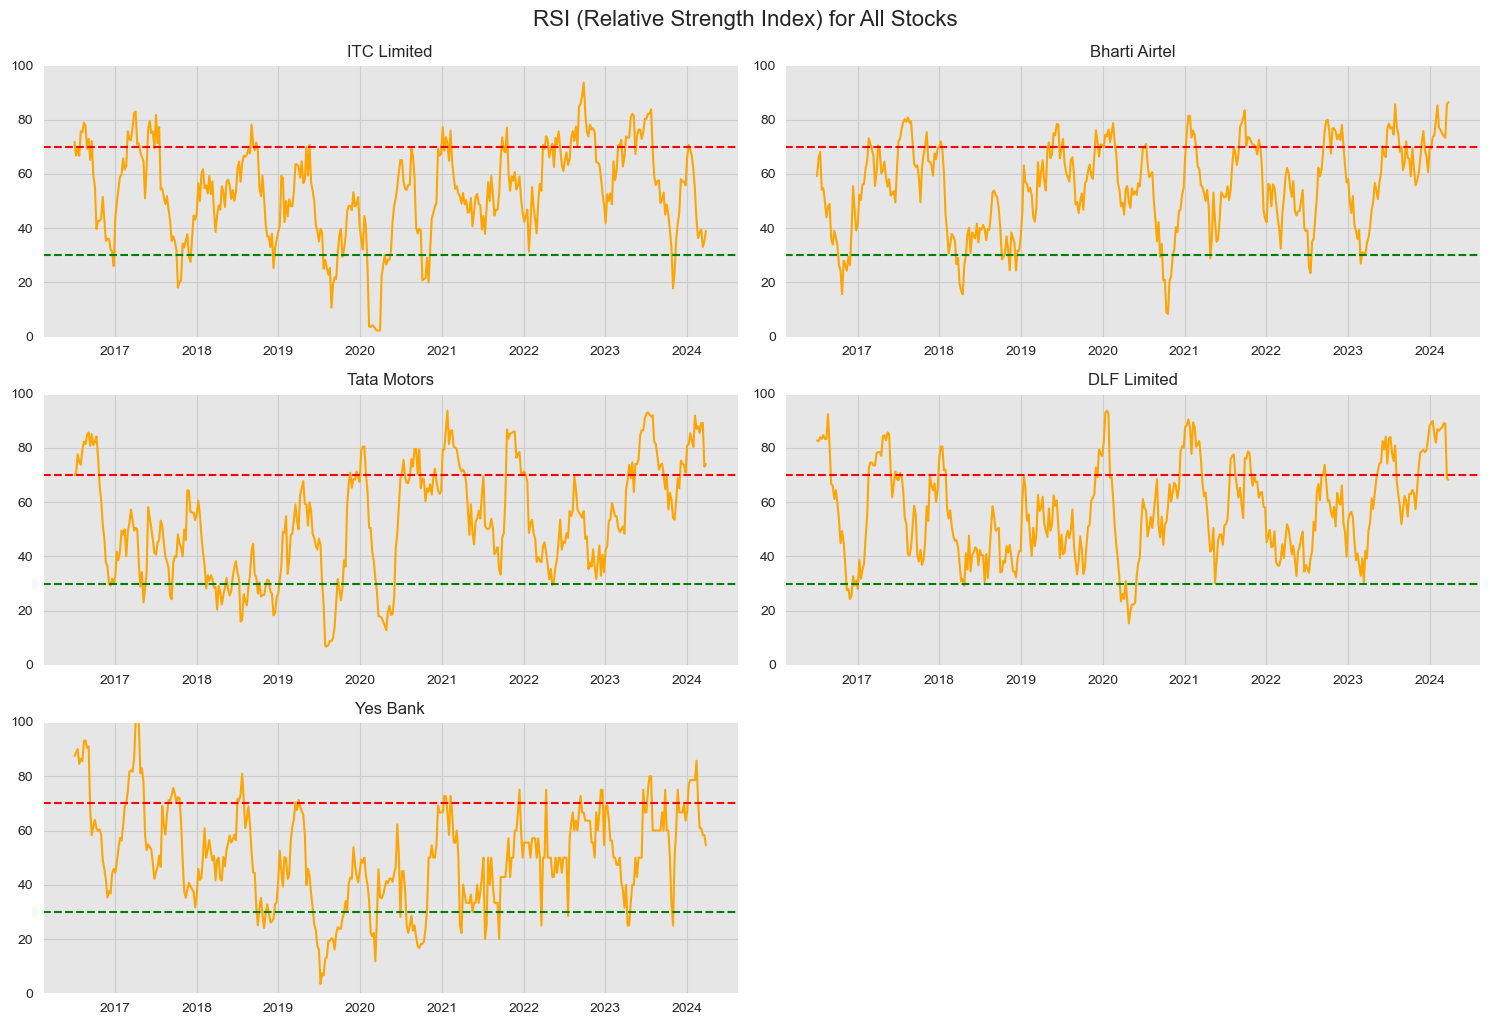

In [28]:
#RSI Plot
plt.figure(figsize=(15, 10))
for i, stock in enumerate(df.columns, 1):
    plt.subplot(3, 2, i)
    plt.plot(rsi_df[stock], label=f'RSI - {stock}', color='orange')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title(stock)
    plt.ylim(0, 100)
    plt.grid(True)
    plt.tight_layout()

plt.suptitle("RSI (Relative Strength Index) for All Stocks", y=1.02, fontsize=16)
plt.show()


**Recalculate weekly returns and portfolio returns**

In [29]:
# Recalculate weekly returns
returns = df.pct_change().dropna()


optimal_weights = np.array([0.25, 0.20, 0.15, 0.20, 0.20])  # Example weights; replace with actual

# Portfolio weekly returns
portfolio_returns = returns.dot(optimal_weights)

# Cumulative returns over time
cumulative_returns = (1 + portfolio_returns).cumprod()


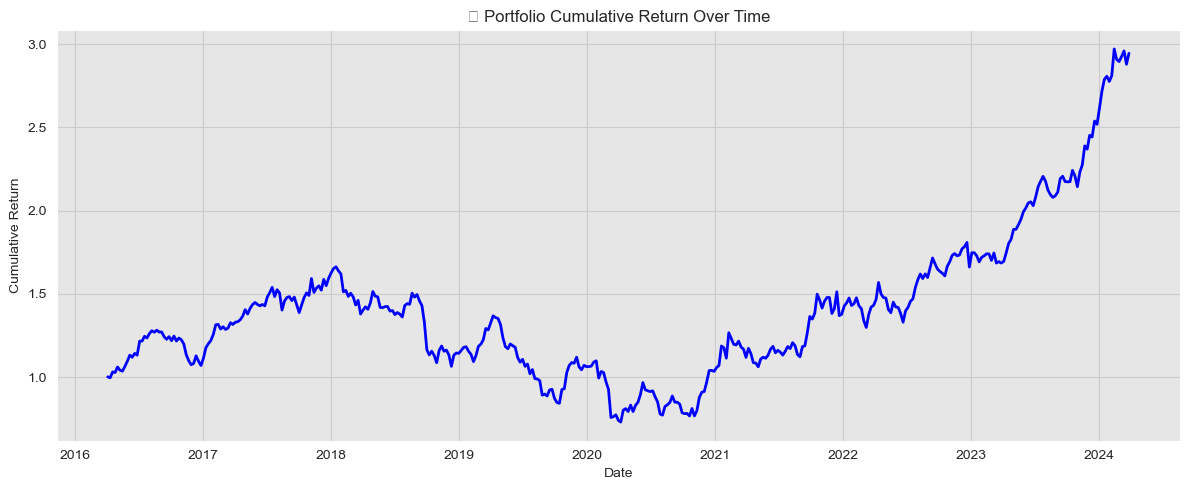

In [30]:
#Plot Cumulative Portfolio Returns Over Time
plt.figure(figsize=(12, 5))
plt.plot(cumulative_returns, color='blue', linewidth=2)
plt.title('📈 Portfolio Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.tight_layout()
plt.show()


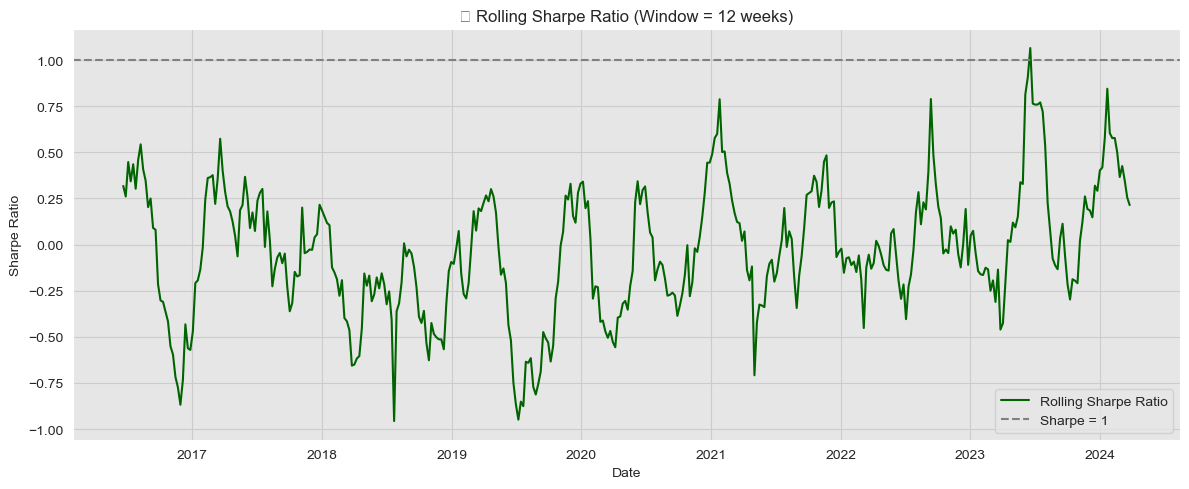

In [31]:
#Rolling Sharpe Ratio (Risk-adjusted monitoring)
rolling_window = 12  # e.g., 12 weeks (~3 months)
risk_free_rate = 0.005  # Weekly

# Rolling mean and std dev
rolling_mean = portfolio_returns.rolling(window=rolling_window).mean()
rolling_std = portfolio_returns.rolling(window=rolling_window).std()

# Rolling Sharpe Ratio
rolling_sharpe = (rolling_mean - risk_free_rate) / rolling_std

# Plot it
plt.figure(figsize=(12, 5))
plt.plot(rolling_sharpe, label='Rolling Sharpe Ratio', color='darkgreen')
plt.axhline(1, color='gray', linestyle='--', label='Sharpe = 1')
plt.title(f'📊 Rolling Sharpe Ratio (Window = {rolling_window} weeks)')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
